In [1]:
###############################################################
# Examples below are (more or less) taken from Wes McKinney's
# "Python for Data Analysis".
###############################################################

# This notebook is written in Python 3.
%matplotlib inline

import random
import numpy as np
from numpy.linalg import inv, qr
import matplotlib.pyplot as plt

In [2]:
# Some quick ways to create simple matrices
print("Zeros:", np.zeros((3, 2)))  # all zeros
print("Ones:", np.ones((3, 2)))   # all ones

# linspace examples
print(np.linspace(2, 3, num=5))
print(np.linspace(2, 3, num=5, endpoint=False))

Zeros: [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
Ones: [[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
[ 2.    2.25  2.5   2.75  3.  ]
[ 2.   2.2  2.4  2.6  2.8]


In [3]:
# np.meshgrid takes two 1D arrays and produces two 2D matrices
# corresponding to all pairs of (x,y)
x = np.array([1,2,3])
y = np.array([4,5])
meshx, meshy = np.meshgrid(x, y)
print("Mesh x-values:", meshx)
print("Mesh y-values:", meshy)

Mesh x-values: [[1 2 3]
 [1 2 3]]
Mesh y-values: [[4 4 4]
 [5 5 5]]


In [4]:
# Multiplication gives element wise multiplication!
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr * arr)

# Matrix multiplication
x = np.array([1, 2, 3])
y = np.array([[0], [5], [10]])
x.dot(y)  # equivalently np.dot(x, y)

[[  1.   4.   9.]
 [ 16.  25.  36.]]


array([40])

In [5]:
# Array slices are different from list slices!
# Array slices do not create a new copy while list slices do.
arr = np.arange(6)
arr_slice = arr[:4]
arr_slice[0] = 999
print(arr, "Original array has changed!")

l = list(range(6))
l_slice = l[:4]
l_slice[0] = 999
print(l, "Original list has not changed.")

[999   1   2   3   4   5] Original array has changed!
[0, 1, 2, 3, 4, 5] Original list has not changed.


In [6]:
# You can assign a single value to an entire array slice.
arr = np.arange(6)
print("Original array:", arr)
arr[:3] = 10
print("Modified array:", arr)

Original array: [0 1 2 3 4 5]
Modified array: [10 10 10  3  4  5]


In [7]:
# Boolean indexing: Can use boolean expression to pick out data we want.

# Generate 7 rows of data, assume each row of data belongs to a name.
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(data)

# Code to select the rows labelled "Bob"
data[names == "Bob"]

# NOTE!! The Python keywords "and" and "or" do not work with boolean arrays.
# Use & and | instead.

[[-0.58993683 -0.60271991  0.57754179  0.41336882]
 [ 0.22904198  0.15704238 -0.44237366  1.18764592]
 [ 0.87536776  0.64080706 -0.53197327  0.73317282]
 [ 1.72941137  0.34790329  1.15229879 -1.59860384]
 [-1.62269209 -0.51403669 -0.2386837  -0.1117459 ]
 [-1.04083947 -0.76418239  0.828897   -0.20640271]
 [ 0.24323662  0.83964764 -0.99995555  2.44746219]]


array([[-0.58993683, -0.60271991,  0.57754179,  0.41336882],
       [ 1.72941137,  0.34790329,  1.15229879, -1.59860384]])

In [8]:
# Fancy indexing
arr = np.arange(32).reshape((8, 4))
print(arr)

# This code returns the values in (1,0) and (5,3) in an array.
arr[[1, 5], [0, 3]]

# NOTE: Fancy indexing always copies data into a new array (unlike array slices).

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23])

In [9]:
# Transposing gives a view of the data without copying anything.
arr = np.arange(6).reshape((2,3))
print("Original Array:", arr)
print("Transpose:", arr.transpose())
print("Transpose:", arr.T)

Original Array: [[0 1 2]
 [3 4 5]]
Transpose: [[0 3]
 [1 4]
 [2 5]]
Transpose: [[0 3]
 [1 4]
 [2 5]]


In [10]:
# Some universal functions
x = np.arange(10)
y = np.arange(9, -1, -1)
print("x:", x)
print("y:", y)

# sqrt & exp work element-wise
print("np.sqrt(x):", np.sqrt(x))

# returns element-wise maximum
print("element-wise max:", np.maximum(x, y))

x: [0 1 2 3 4 5 6 7 8 9]
y: [9 8 7 6 5 4 3 2 1 0]
np.sqrt(x): [ 0.          1.          1.41421356  1.73205081  2.          2.23606798
  2.44948974  2.64575131  2.82842712  3.        ]
element-wise max: [9 8 7 6 5 5 6 7 8 9]


In [11]:
# Conditional logic for array operations
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

# Suppose we want xarr when cond is True and yarr when cond is False.
# List comprehensions will take too long for large arrays and will not
# be able to handle multi-dimensional arrays. Use np.where instead.
np.where(cond, xarr, yarr)

# Note: It is possible to nest np.where to get more complicated logic, e.g.
# np.where(cond1, 0, np.where(cond2, 1, 2))

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [12]:
# Some common statistical methods
arr = np.arange(1, 11)
print("arr:", arr)
print("Mean:", arr.mean())
print("Sum:", arr.sum())
print("Std & Var:", arr.std(), arr.var())
print("Cumulative Sum:", arr.cumsum()) # This returns an array of cumsums!

# Some functions can take an axis argument.
arr2 = arr.reshape((5, 2))
print("arr2:", arr2)
print("Mean of whole matrix:", arr2.mean())
print("Column means:"       , arr2.mean(axis=0))
print("Row means:"          , arr2.mean(axis=1))


arr: [ 1  2  3  4  5  6  7  8  9 10]
Mean: 5.5
Sum: 55
Std & Var: 2.87228132327 8.25
Cumulative Sum: [ 1  3  6 10 15 21 28 36 45 55]
arr2: [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
Mean of whole matrix: 5.5
Column means: [ 5.  6.]
Row means: [ 1.5  3.5  5.5  7.5  9.5]


In [13]:
# Arrays can be sorted in place
arr = np.random.randn(5)
print(arr)
arr.sort()
print(arr)

[ 0.15628281  1.12746404 -0.06290467 -0.90553138 -1.21590629]
[-1.21590629 -0.90553138 -0.06290467  0.15628281  1.12746404]


In [14]:
# Get unique items in 1D array
arr = np.array([0, 0, 2, 2, 0, 1, 1, 2])
print(np.unique(arr))

# Test if the values of a 1D array appear in a particular array
print(np.in1d(arr, [0]))

[0 1 2]
[ True  True False False  True False False False]


In [15]:
# Inverse matrix
A = np.array([[1, 3],
             [2, 7]])
B = inv(A)
print(B)
print(np.dot(A, B))

# QR decomposition
q, r = qr(A)
r

[[ 7. -3.]
 [-2.  1.]]
[[ 1.  0.]
 [ 0.  1.]]


array([[-2.23606798, -7.60263112],
       [ 0.        ,  0.4472136 ]])

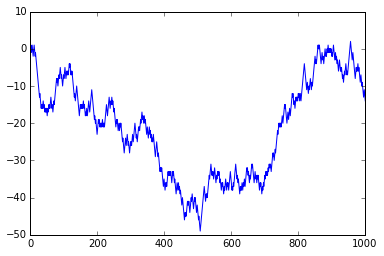

In [17]:
######################
# RANDOM WALK EXAMPLE
######################
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


plt.plot(walk)
plt.show()

# Simulate many random walks at once using numpy
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))  # 0 or 1
steps = np.where(draws > 0, 1, -1)  # replace the 0s with -1s
walks = steps.cumsum(1)  # cumulative sum across rows (i.e. each row is a walk)